In [23]:
from datetime import datetime as dt

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import re

In [25]:
r = requests.get("https://api.covid19api.com/dayone/country/philippines")
js = json.loads(r.content)

In [39]:
dataset = []
for s in js:
    # Indices Mapping.
    # 0 - date, 1 - cases, 2 - deaths, 3 - recovered, 4 - 
    date = dt.strptime(s["Date"], "%Y-%m-%dT%H:%M:%SZ")
    
    cases = s["Confirmed"]
    deaths = s["Deaths"]
    recoveries = s["Recovered"]

    active_cases = cases - recoveries - deaths
    
        # Append to data set
    dataset.append({"date": date, "cases": cases, "deaths": deaths, "recoveries": recoveries, "active_cases": active_cases})

In [50]:
size = len(dataset)
for i in range(size):
    data = dataset[i]
    if i + 1 < size:
        prev_data = dataset[i + 1]
        
        cases_diff =  prev_data["cases"] - data["cases"]
        deaths_diff = prev_data["deaths"] - data["deaths"]
        recoveries_diff = prev_data["recoveries"] - data["recoveries"]
        
        data["cases_diff"] = cases_diff
        data["deaths_diff"] = deaths_diff
        data["recoveries_diff"] = recoveries_diff
        
covid_df = pd.DataFrame(dataset)
covid_df["cases_diff"] = covid_df["cases_diff"].fillna(0).astype(int)
covid_df["deaths_diff"] = covid_df["deaths_diff"].fillna(0).astype(int)
covid_df["recoveries_diff"] = covid_df["recoveries_diff"].fillna(0).astype(int)

In [51]:
covid_df

,date,cases,deaths,recoveries,active_cases,cases_diff,deaths_diff,recoveries_diff
0,2020-01-30,1,0,0,1,0,0,0
1,2020-01-31,1,0,0,1,0,0,0
2,2020-02-01,1,0,0,1,1,1,0
3,2020-02-02,2,1,0,1,0,0,0
4,2020-02-03,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
102,2020-05-11,11086,726,1999,8361,264,25,107
103,2020-05-12,11350,751,2106,8493,268,21,145
104,2020-05-13,11618,772,2251,8595,258,18,86
105,2020-05-14,11876,790,2337,8749,215,16,123


In [52]:
# Plot annotation Labeling function
def label(xs, ys, step, color, xo, yo):
    zippy = list(zip(xs, ys))
    for i in range(0, len(zippy), step):
        x, y = zippy[i]
        if y == 0:
            continue
        plt.annotate(y, (x, y), textcoords="offset points", color=color, xytext=(xo, yo), ha="center")

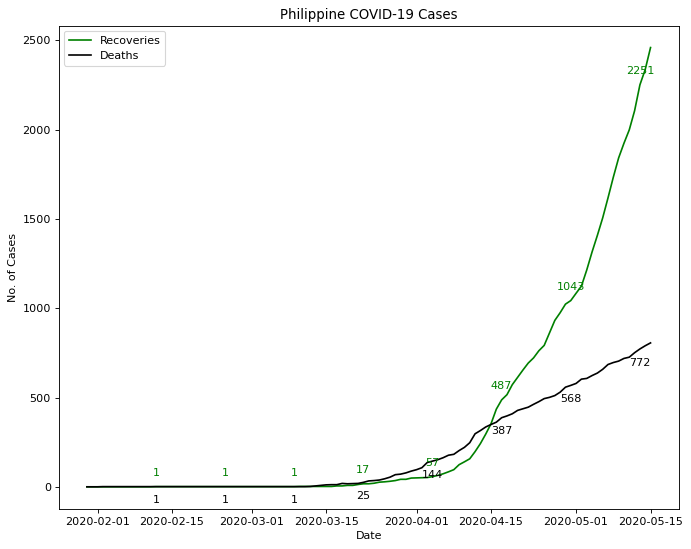

In [53]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["recoveries"]
step = 13

# Plot recoveries
label(xs, ys, step, "green", 0, 10)
plt.plot(xs, ys, color="green", label="Recoveries")

# Plot deaths
ys = covid_df["deaths"]
label(xs, ys, step, "black", 0, -15)
plt.plot(xs, ys, color="black", label="Deaths")

plt.legend(loc="upper left")
plt.show()

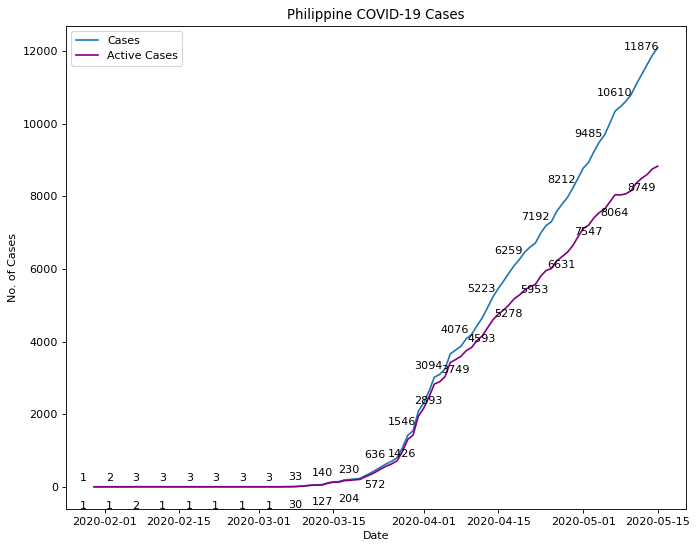

In [54]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["cases"]

# Plot cases
label(xs, ys, 5, "black", -10, 5)
plt.plot(xs, ys, label="Cases")
ys = covid_df["active_cases"]
label(xs, ys, 5, "black", -10, -20)
plt.plot(xs, ys, label="Active Cases", color="purple")
plt.legend(loc="upper left")
plt.show()

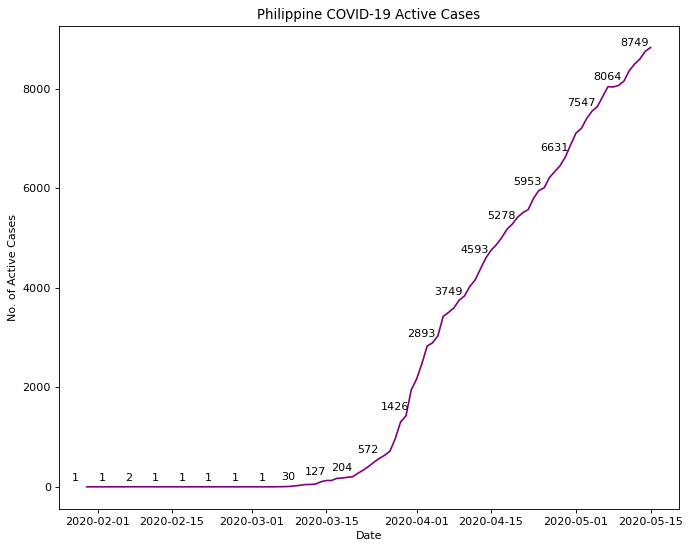

In [66]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Active Cases")
plt.xlabel("Date")
plt.ylabel("No. of Active Cases")

xs = covid_df["date"]
ys = covid_df["active_cases"]

# Plot cases
label(xs, ys, 5, "black", -10, 5)
plt.plot(xs, ys, label="Cases", color="purple")

plt.show()

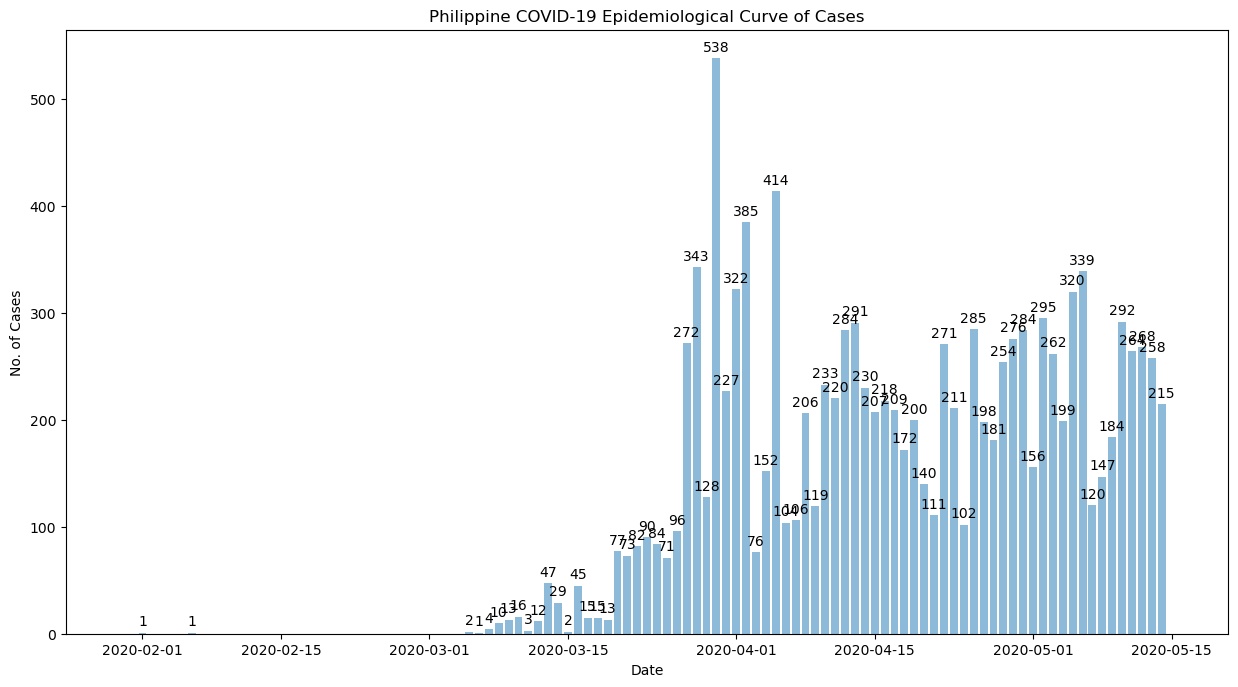

In [72]:
fig = plt.figure(figsize=(15, 8), dpi= 100, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Epidemiological Curve of Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["cases_diff"]

label(xs, ys, 1, "black", 0, 5)
plt.bar(xs, ys, align='center', alpha=0.5)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 8), dpi= 100, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Daily Deaths")
plt.xlabel("Date")
plt.ylabel("No. of Deaths")

xs = covid_df["date"]
ys = covid_df["deaths_diff"]

label(xs, ys, 1, "black", 0, 5)
plt.bar(xs, ys, align='center', alpha=0.5, color="k")

plt.show()

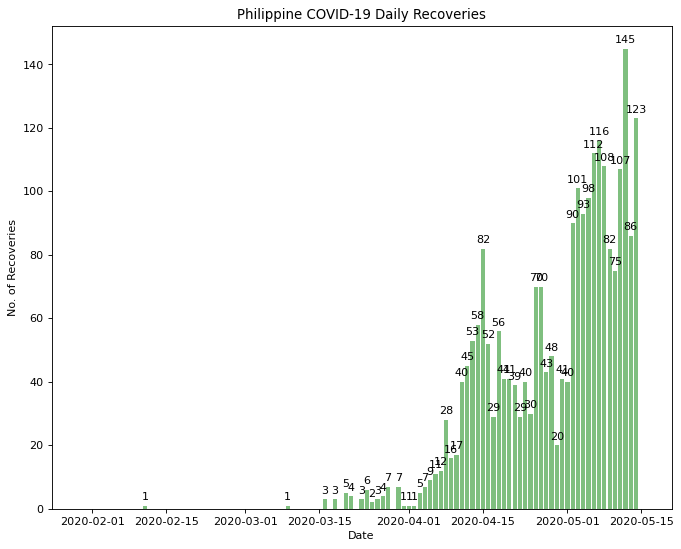

In [58]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Daily Recoveries")
plt.xlabel("Date")
plt.ylabel("No. of Recoveries")

xs = covid_df["date"]
ys = covid_df["recoveries_diff"]

label(xs, ys, 1, "black", 0, 5)
plt.bar(xs, ys, align='center', alpha=0.5, color="g")

plt.show()